In [1]:
import numpy as np
import pandas as pd
from  sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples=200)

In [4]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)

In [5]:
y_pred = kmeans.fit_predict(X)

In [9]:
print(y_pred)

[1 1 0 2 0 4 0 3 1 3 0 1 2 1 2 3 4 0 0 0 3 1 2 2 4 3 2 0 0 0 2 0 3 4 2 4 2
 0 2 2 1 3 0 3 0 0 4 3 2 4 2 3 4 1 1 0 4 3 4 0 0 2 0 4 1 0 4 0 2 1 0 1 0 1
 0 4 2 4 2 1 4 4 3 3 0 2 2 1 0 0 1 2 1 3 2 3 0 4 1 0 0 0 3 3 3 2 4 0 1 0 4
 4 0 0 1 0 0 2 3 0 1 0 0 0 2 0 0 3 0 2 3 3 2 3 4 0 1 1 0 0 0 2 2 1 0 0 0 3
 4 2 2 4 0 0 2 0 1 0 0 0 3 3 0 3 0 0 3 1 0 0 4 3 4 0 0 0 1 1 2 4 2 1 0 4 3
 0 0 3 2 2 2 4 3 0 3 1 3 4 3 1]


In [10]:
kmeans.cluster_centers_

array([[-3.07004151,  5.54464096],
       [ 1.63224631, -9.07764569],
       [ 0.60943242, -7.48944206],
       [-0.01665145,  5.60156722],
       [-0.65130591,  7.39419085]])

In [11]:
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([3, 3, 0, 0])

In [14]:
kmeans.transform(X_new).round(2)  #Affinity Score.

array([[ 4.69, 11.2 ,  9.51,  3.6 ,  5.43],
       [ 7.03, 11.16,  9.79,  4.7 ,  6.51],
       [ 2.55, 12.94, 11.09,  3.96,  4.98],
       [ 3.05, 12.47, 10.62,  4.3 ,  5.43]])

In [18]:
good_init = [[-3,3],[-3,2],[-3,1],[-1,2],[0,2]]
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1, random_state=42)

In [19]:
kmeans.fit(X)

KMeans(init=[[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]], n_clusters=5,
       n_init=1, random_state=42)

In [20]:
kmeans.inertia_

294.77475245319414

In [21]:
from sklearn.metrics import silhouette_score

silhouette_score(X,kmeans.labels_)

0.44358678667630813

# Color Segmentation

In [26]:
from PIL import Image

In [28]:
image = np.asarray(Image.open("Nemo.jpeg"))

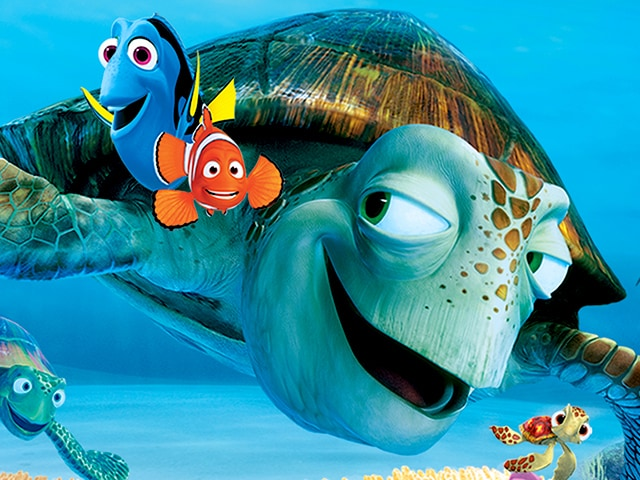

In [54]:
Image.fromarray(np.uint8(image)).convert('RGB')

In [30]:
image.shape

(480, 640, 3)

In [31]:
X = image.reshape(-1,3)

In [55]:
kmeans = KMeans(n_clusters=8,random_state=42).fit(X)

In [56]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

In [57]:
segmented_img = segmented_img.reshape(image.shape)

In [58]:
type(segmented_img)

numpy.ndarray

In [59]:
import matplotlib.pyplot as plt

pil_image = Image.fromarray(np.uint8(segmented_img)).convert('RGB')

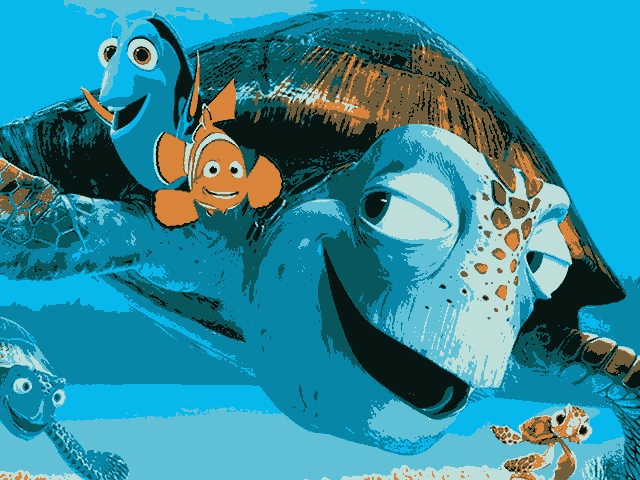

In [60]:
pil_image

# Clustering for Semi-Supervised Learning.

In [62]:
from sklearn.datasets import load_digits

X_digits,y_digits = load_digits(return_X_y=True)
X_train,y_train = X_digits[:1400], y_digits[0:1400]
X_test,y_test = X_digits[1400:],y_digits[1400:]

In [70]:
X_train.shape

(1400, 64)

In [65]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [66]:
log_reg.score(X_test,y_test)

0.7481108312342569

In [67]:
k = 50
kmeans = KMeans(n_clusters=k,random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [68]:
X_digits_dist

array([[53.8347602 , 41.42507119, 40.38645515, ..., 46.70298587,
        43.32913642, 41.73144964],
       [22.96665235, 50.3636375 , 45.70161035, ..., 48.27458499,
        43.06000537, 50.03512655],
       [29.42934195, 50.1412468 , 43.36356873, ..., 50.49457617,
        47.66591091, 53.60050269],
       ...,
       [49.57764931, 56.45575913, 36.34319282, ..., 46.91590586,
        54.17253975, 56.99134925],
       [49.46706914, 55.89670767, 33.61503416, ..., 46.99966903,
        53.61297942, 54.25569607],
       [38.3721188 , 43.90294928, 48.93405716, ..., 43.3609143 ,
        41.15263129, 37.04745455]])

In [71]:
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
X_representative_digits = X_train[representative_digit_idx]

In [75]:
X_representative_digits

array([[ 0.,  0.,  1., ...,  9.,  0.,  0.],
       [ 0.,  0.,  4., ...,  9.,  1.,  0.],
       [ 0.,  0.,  0., ..., 16.,  7.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  6.,  0.,  0.],
       [ 0.,  0., 12., ...,  9.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.]])

In [76]:
y_repr_digits = [1,3,6,0,7,9,2,4,8,9,
                5,4,7,1,2,6,8,2,5,1,
                4,1,3,3,8,8,2,5,6,9,
                1,4,0,6,8,3,4,6,7,2,
                4,1,0,7,5,1,9,9,3,7]

In [77]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_repr_digits)
log_reg.score(X_test,y_test)

0.8261964735516373

# DBSCAN

In [80]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [82]:
X,y = make_moons(n_samples=1000, noise = 0.05)
dbscan = DBSCAN(eps=0.05,min_samples=5)

In [83]:
dbscan.fit(X)

DBSCAN(eps=0.05)

In [85]:
dbscan.labels_   # Cluster Index equal to -1 are anamolies.

array([ 0,  0,  1,  2,  1,  2, -1,  1,  1,  3,  2,  1,  4,  4,  5,  2,  2,
        3,  5,  4, -1,  4,  6,  7,  5,  0,  5, -1,  1,  7,  2,  1,  3,  5,
       -1, 13,  0,  5,  0,  5,  7, -1,  8,  5,  0,  4,  2,  4,  9,  1,  4,
        7,  8,  1,  5,  3,  5, -1,  2,  1,  4,  2,  5,  5,  1,  4,  5,  5,
        3,  1, -1,  1, -1,  5, -1,  1,  5,  7,  3,  0,  9,  0,  2,  2,  5,
        7,  7,  1,  2,  5,  3,  4,  2, -1,  1,  1,  1,  1,  5,  1,  8, -1,
        5,  7,  3,  1,  4,  3,  3,  6,  1,  5,  0,  4,  4,  1,  5,  3,  5,
        2, -1,  3,  2,  1,  2,  1,  8,  3,  4,  5,  5,  3,  1,  1,  0,  1,
        1, -1,  2,  2,  1,  1,  3,  6,  3,  1,  1,  5,  1,  5,  5,  1,  4,
        2,  7,  2,  7,  2,  5,  5,  2,  1,  0,  1,  5,  3,  4,  7, 10, 12,
        1,  1,  7,  6,  3,  5,  1,  3,  5,  1,  3,  5,  7,  6,  8, 10,  5,
       -1,  3,  2,  8,  4,  4,  4,  8,  2,  1,  1,  1,  9, 11,  1,  2,  3,
        2,  2,  2,  5, 12,  1,  1,  1,  1,  0,  3,  4,  6,  4,  0,  3,  0,
       -1,  7,  5, -1,  1

In [91]:
dbscan.core_sample_indices_  # Gets the core instances indices

array([  0,   1,   2,   3,   4,   5,   7,   8,   9,  10,  12,  13,  14,
        15,  16,  18,  19,  21,  22,  23,  24,  25,  26,  28,  29,  30,
        31,  32,  33,  36,  37,  38,  39,  40,  42,  44,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  59,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  71,  73,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  88,  89,  90,  91,  92,  94,  95,  96,
        98,  99, 100, 103, 106, 107, 108, 109, 110, 113, 114, 115, 117,
       118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 170, 171, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 21

In [92]:
dbscan.components_  # Gets the core samples cordinates

array([[ 0.010696  ,  0.42094492],
       [ 0.00998543,  0.44932732],
       [ 1.55204134, -0.33445177],
       ...,
       [-0.86428875,  0.57302179],
       [-0.02762021,  0.50011789],
       [ 0.62087395, -0.3657005 ]])

In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [104]:
X_new = np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
knn.predict(X_new)

array([4, 0, 3, 1], dtype=int64)

In [105]:
knn.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [96]:
knn.predict_proba(X_new)

array([[0.12, 0.  , 0.  , 0.  , 0.88, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [0.  , 0.26, 0.22, 0.32, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02,
        0.16, 0.  , 0.02],
       [0.  , 0.6 , 0.  , 0.  , 0.  , 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ]])

In [97]:
y_dist, y_pred_idx = knn.kneighbors(X_new,n_neighbors=1)

In [102]:
y_dist,y_pred_idx

(array([[0.41998115],
        [0.01679496],
        [0.09864391],
        [0.48992758]]),
 array([[350],
        [602],
        [351],
        [113]], dtype=int64))

In [98]:
y_pred =  dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]

In [103]:
y_pred

array([[-1],
       [ 0],
       [11],
       [-1]], dtype=int64)

In [99]:
y_pred[y_dist > 0.2] = -1

In [100]:
y_pred.ravel()

array([-1,  0, 11, -1], dtype=int64)

# Gaussian Mixtures

In [106]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init = 10)

In [107]:
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [109]:
gm.weights_

array([0.20356096, 0.20763667, 0.58880237])

In [110]:
gm.means_

array([[ 1.74753861, -0.0522463 ],
       [-0.73665604,  0.56643134],
       [ 0.50662222,  0.24215935]])

In [111]:
gm.covariances_

array([[[ 0.05525575,  0.06336228],
        [ 0.06336228,  0.09019721]],

       [[ 0.05627786,  0.06414976],
        [ 0.06414976,  0.0888953 ]],

       [[ 0.16649336, -0.10089568],
        [-0.10089568,  0.2900004 ]]])

In [112]:
gm.converged_

True

In [113]:
gm.n_iter_

15

In [115]:
x_new,y_new = gm.sample(6)

In [116]:
gm.predict(x_new)

array([0, 1, 1, 2, 2, 2], dtype=int64)

In [118]:
gm.score_samples(x_new).round(2)

array([-0.12,  0.06, -0.65, -1.04, -2.28, -0.92])

In [119]:
densities = gm.score_samples(X)

In [121]:
densities

array([-1.50479353e+00, -1.49374871e+00, -3.75539254e-01, -1.53211869e+00,
       -7.52085932e-02, -1.67539314e+00, -2.21628904e+00, -2.14485316e+00,
       -9.87154118e-01, -1.71192370e+00, -1.78159973e+00, -6.83596005e-01,
       -1.02147608e-01, -1.50571612e-01, -1.84679698e+00, -1.60886448e+00,
       -1.41794777e+00, -1.42810525e+00, -1.74172425e+00, -1.63114016e-01,
       -2.91368640e+00, -6.38727345e-01, -1.31829847e+00, -1.46702571e+00,
       -6.43751299e-01, -1.52991613e+00, -1.58085982e+00, -1.39614878e+00,
       -8.69074089e-01, -1.51835074e+00, -1.58194410e+00, -5.43444052e-01,
       -1.56263988e+00, -4.83414053e-01,  2.73817264e-02, -1.55585351e+00,
       -1.57697150e+00, -1.58870731e+00, -1.57333606e+00, -2.22965425e+00,
       -1.57133186e+00, -1.43129941e+00, -1.57097671e+00, -1.60677542e+00,
       -1.40992881e+00, -1.55754795e+00, -1.80758829e+00, -1.82788046e-01,
       -2.49291406e-01, -6.05037496e-01, -4.39224485e-01, -1.51138840e+00,
       -1.72982958e+00, -

In [122]:
density_threshold = np.percentile(densities,2)
anomolies = X[densities < density_threshold]

In [123]:
anomolies

array([[-0.99575039, -0.00528139],
       [ 1.9646709 ,  0.47997732],
       [ 1.99505831,  0.51009734],
       [ 1.97941294,  0.52506826],
       [-1.03971601, -0.00800887],
       [ 1.91960913,  0.45878934],
       [-0.88278371,  0.0453844 ],
       [ 2.07748167,  0.54416645],
       [-0.9430554 ,  0.06867831],
       [ 1.80215508, -0.357217  ],
       [-0.9124775 ,  0.07903468],
       [-1.09197665,  0.36423061],
       [-1.01791282, -0.07708014],
       [ 1.99545031,  0.48693795],
       [-0.98644491,  0.0271715 ],
       [ 2.05893051,  0.5866713 ],
       [-1.04774862, -0.01526284],
       [-0.9769411 , -0.0755089 ],
       [ 1.90592694,  0.54926925],
       [-0.71362899,  0.88256936]])